## Contour deformation 

In the context of GW method, contour deformation (CD) technique is used in conjunction with resolution of identity (RI) to reduce the formal scaling of the self-energy calculation. Compared to widely used analytic continuation approach it provides a means to evaluate self-energy  directly on the real axis without employing Pade approximants or non-linear least squares fit and potentially offering superior accuracy. Here, we provide a brief outline of the theory behind CD and give an example of the self-energy calculation within CD without invoking RI in order to facilitate comparison with the results prsented above. 

Detailed discussion of the CD can be found in the following papers:

1. Golze, D., Wilhelm, J., van Setten, M. J., & Rinke, P. (2018). Core-Level Binding Energies from GW : An Efficient Full-Frequency Approach within a Localized Basis. Journal of Chemical Theory and Computation, 14(9), 4856–4869. https://doi.org/10.1021/acs.jctc.8b00458

2. Giantomassi, M., Stankovski, M., Shaltaf, R., Grüning, M., Bruneval, F., Rinke, P., & Rignanese, G.-M. (2011). Electronic properties of interfaces and defects from many-body perturbation theory: Recent developments and applications. Physica Status Solidi (B), 248(2), 275–289. https://doi.org/10.1002/pssb.201046094

CD is used to recast the convolution in the GW expression of self-energy as a difference between two integrals, one which can be performed analytically whereas the other can be evaluated numerically on a relatively small grid. This is achieved by closing the inegration contour as shown below [2]:

![Integration contour used to evaluate $\Sigma(\omega)$](CD_scheme.jpg)

$$
\Sigma(r_1,r_2, \omega) = \frac{i}{2\pi} \int_{-\infty}^{+\infty} e^{i\omega^{\prime} \eta} G(r_1, r_2, \omega + \omega^{\prime}) W(r_1, r_2, \omega^{\prime}) d\omega^{\prime}\\ 
= \frac{i}{2\pi} \oint_{\Gamma} G(r_1, r_2, \omega + z) W(r_1, r_2, z) dz -  \frac{1}{2\pi} \int_{-\infty}^{+\infty} G(r_1, r_2, \omega + i\omega^{\prime}) W(r_1, r_2, i\omega^{\prime}) d\omega^{\prime}
$$

Depending on the $\omega$ value the lower-left and the upper-right loops of the contour can enclose one or several poles of the zero-order Green's function whereas the poles of the screened Coulomb interaction never fall within the contour. This allowes to evaluate the countour integral as a sum of corresponding residues with apropriate signs (note that the upper-right loop is traversed counter-clockwise, while the lower-left loop is traversed clockwise). The imaginary axis contribution is calculated using Gauss-Legendre grid. Importantly, the intgrals over the arches vanish iff the screened Coulomb interaction does not contain the exchange contribution.

In [1]:
import psi4
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from IPython.core.display import display, HTML

display(HTML("<style>.container {width:95% !important;}</style>"))


In [3]:

psi4.set_options({'basis' : 'def2-qzvp', 'd_convergence' : 1e-7,'scf_type' : 'out_of_core', 'dft_spherical_points' : 974, 'dft_radial_points' : 150 })

h2o = psi4.geometry("""O  0.0000 0.0000 0.0000
                       H  0.7571 0.0000 0.5861
                       H -0.7571 0.0000 0.5861
                       symmetry c1
                       units angstrom
""")



psi4.set_output_file('h2o_def2-qzvp.out')

scf_e, scf_wfn = psi4.energy('PBE', return_wfn=True)


print("DFT energy is %16.10f" % scf_e)
epsilon = np.asarray(scf_wfn.epsilon_a())
print(epsilon*psi4.constants.hartree2ev)

DFT energy is   -76.3866270196
[-5.10297553e+02 -2.52921286e+01 -1.31400617e+01 -9.24893376e+00
 -7.16265760e+00 -3.16795471e-01  1.48149608e+00  5.85933778e+00
  6.38051010e+00  6.44543295e+00  7.31903549e+00  9.71153544e+00
  1.14082531e+01  1.29640690e+01  1.45628573e+01  1.54214157e+01
  1.98727673e+01  2.31113343e+01  2.38443631e+01  2.52297149e+01
  2.61248738e+01  3.23397294e+01  3.27091864e+01  3.32373745e+01
  3.48072652e+01  3.49994126e+01  3.63586637e+01  4.61362859e+01
  4.87258275e+01  5.14801507e+01  5.19484109e+01  5.42548120e+01
  5.91706652e+01  5.94636902e+01  6.05084566e+01  6.05995374e+01
  6.29085379e+01  6.58388766e+01  6.70257969e+01  6.92465091e+01
  6.97522471e+01  7.48082594e+01  7.67546298e+01  8.12494210e+01
  8.21943405e+01  8.46520534e+01  9.70874427e+01  9.96835961e+01
  1.00987494e+02  1.01312960e+02  1.06342622e+02  1.06775220e+02
  1.10505489e+02  1.11176526e+02  1.15794184e+02  1.21753580e+02
  1.25223234e+02  1.26631539e+02  1.37369345e+02  1.4114721

``` SCF Total Energy (Ha):      -76.3866271764 (MOLGW) ```

In [4]:
import GW

In [5]:
# Realistic test of evGW; Purpose : study the shift of the core level
import time 
start = time.time()
# Analytic calculation for reference purposes
gw_par = {'no_qp' : 5, 'nv_qp' : 0, 'nomega_sigma' : 501, 'step_sigma' : 0.01, 'gl_npoint' : 200, 'analytic_W' : True, 'low_mem' : True, 'evgw_iter' : 5 }
gw_h2o_test_ev = GW.GW_DFT(scf_wfn, h2o, gw_par)
gw_h2o_test_ev.print_summary()
end = time.time()
print("GW calculation took %10.2f s" % (end - start))

Number of basis functions:  117
occ/virt: 5/112
Attempting to create RI basis set for DEF2-QZVP (RIFIT)... 
Auxiliary basis set has been generated!
Number of auxiliary basis functions:  253
Fraction of HF exchange is  0.000
Running in production mode!
Shape of the omega_grid_all is  (5, 501)
Caculating GW self-energy via contour deformation
Analytic W has been requested; performing RPA calculation
Shape of omega tensor is  (117, 117, 560)
Calculation of the integral term requires    0.208 Gb
Calculation of the residue term requires     0.523 Gb
Using low-memory algorithm
Finished calculating self-energy
Performing one-shot G0W0
SigX - Vxc
[-1.79439961 -0.4279894  -0.24130434 -0.25277554 -0.2524126 ]
Perfoming graphic solution of the inverse Dyson equation
Done!
Starting evGW loop...
Number of iterations is 5
[-538.65634941  -32.27403139  -19.28418559  -15.09093097  -12.85411774]
[-539.99810555  -32.66311176  -19.41989935  -15.26846555  -13.0541593 ]
[-540.03866608  -32.6703558   -19.42

In [6]:
# Analytic calculation for reference purposes
gw_par = {'no_qp' : 5, 'nv_qp' : 1, 'nomega_sigma' : 501, 'step_sigma' : 0.01, 'gl_npoint' : 200, 'analytic_W' : True, 'low_mem' : True }
gw_h2o_analytic = GW.GW_DFT(scf_wfn, h2o, gw_par)
gw_h2o_analytic.print_summary()

Number of basis functions:  117
occ/virt: 5/112
Attempting to create RI basis set for DEF2-QZVP (RIFIT)... 
Auxiliary basis set has been generated!
Number of auxiliary basis functions:  253
Fraction of HF exchange is  0.000
Running in production mode!
Shape of the omega_grid_all is  (6, 501)
Caculating GW self-energy via contour deformation
Analytic W has been requested; performing RPA calculation
Shape of omega tensor is  (117, 117, 560)
Calculation of the integral term requires    0.208 Gb
Calculation of the residue term requires     0.523 Gb
Using low-memory algorithm
Finished calculating self-energy
Performing one-shot G0W0
SigX - Vxc
[-1.79439961 -0.4279894  -0.24130434 -0.25277554 -0.2524126   0.12923034]
Perfoming graphic solution of the inverse Dyson equation
Done!
E^lin, eV  E^graph, eV  Z 
  -530.074761    -523.731793       0.697392
   -28.012452     -29.158432       0.389625
   -18.536989     -18.471773       0.878388
   -14.329173     -14.171964       0.869607
   -12.111691

In [7]:
# Pure RI-GW calculation with approximte W
gw_par = {'no_qp' : 5, 'nv_qp' : 1, 'nomega_sigma' : 501, 'step_sigma' : 0.01, 'gl_npoint' : 200, 'low_mem' : True }
gw_h2o_approx = GW.GW_DFT(scf_wfn, h2o, gw_par)
gw_h2o_approx.print_summary()

Number of basis functions:  117
occ/virt: 5/112
Attempting to create RI basis set for DEF2-QZVP (RIFIT)... 
Auxiliary basis set has been generated!
Number of auxiliary basis functions:  253
Fraction of HF exchange is  0.000
Running in production mode!
Shape of the omega_grid_all is  (6, 501)
Caculating GW self-energy via contour deformation
Calculation of the integral term requires    0.208 Gb
Calculation of the residue term requires     0.523 Gb
Using low-memory algorithm
Finished calculating self-energy
Performing one-shot G0W0
SigX - Vxc
[-1.79439961 -0.4279894  -0.24130434 -0.25277554 -0.2524126   0.12923034]
Perfoming graphic solution of the inverse Dyson equation
Done!
E^lin, eV  E^graph, eV  Z 
  -530.069784    -523.731793       0.697392
   -28.011997     -29.158436       0.389653
   -18.536049     -18.471772       0.878388
   -14.327809     -14.171969       0.869607
   -12.110254     -11.972672       0.869554
     2.376616       2.370377       0.968496
Graphical solver printout

```
 GW eigenvalues (eV)
   #        E0         SigX-Vxc       SigC          Z        E_qp^lin     E_qp^graph
   1   -510.297648   -48.828757    20.486502     0.697391  -530.063286  -523.732203
   2    -25.292133   -11.646288     4.668750     0.389748   -28.011615   -29.158555
   3    -13.140064    -6.566253     0.425050     0.878389   -18.534428   -18.472183
   4     -9.248936    -6.878411     1.040598     0.869607   -14.325536   -14.172236
   5     -7.162660    -6.868523     1.181261     0.869551   -12.108024   -11.973068

```

In [10]:
pbeh_golze = {
    "name": "GOLZE_PBEh",
    "x_functionals": {"GGA_X_PBE": {"alpha": 0.5}},
    "x_hf": {"alpha": 0.5},
    "c_functionals": {"GGA_C_PBE": {}}
}

scf_e05, scf_wfn05 = psi4.energy('SCF', return_wfn=True, dft_functional=pbeh_golze)


print("DFT energy is %16.10f" % scf_e05)
epsilon = np.asarray(scf_wfn05.epsilon_a())
print(epsilon*psi4.constants.hartree2ev)

DFT energy is   -76.3879652627
[-5.35099661e+02 -3.15192602e+01 -1.67817892e+01 -1.30151163e+01
 -1.09378531e+01  1.28496865e+00  2.85034591e+00  7.54731212e+00
  8.30776851e+00  8.38731430e+00  9.64640683e+00  1.18900159e+01
  1.35445943e+01  1.51803439e+01  1.67773608e+01  1.77168149e+01
  2.20640019e+01  2.54799034e+01  2.60901081e+01  2.80741766e+01
  2.92972265e+01  3.59509144e+01  3.61086742e+01  3.64168425e+01
  3.82251283e+01  3.87110324e+01  4.02140686e+01  4.97052866e+01
  5.21104196e+01  5.49482655e+01  5.54271955e+01  5.79110041e+01
  6.25457277e+01  6.30977110e+01  6.40010098e+01  6.42232670e+01
  6.62811755e+01  6.94178674e+01  7.05912057e+01  7.28745311e+01
  7.37135403e+01  7.87702052e+01  8.09612500e+01  8.60632776e+01
  8.61972835e+01  8.99928778e+01  1.02441206e+02  1.05453957e+02
  1.06517270e+02  1.06899094e+02  1.11799217e+02  1.13126293e+02
  1.16487064e+02  1.16800323e+02  1.21715307e+02  1.27371717e+02
  1.31694415e+02  1.32620791e+02  1.45215278e+02  1.4785234

In [11]:
# Pure RI-GW calculation with approximte W
gw_par = {'no_qp' : 5, 'nv_qp' : 1, 'nomega_sigma' : 501, 'step_sigma' : 0.01, 'gl_npoint' : 200, 'low_mem' : True }
gw_h2o_pbeh = GW.GW_DFT(scf_wfn05, h2o, gw_par)
gw_h2o_pbeh.print_summary()

Number of basis functions:  117
occ/virt: 5/112
Attempting to create RI basis set for DEF2-QZVP (RIFIT)... 
Auxiliary basis set has been generated!
Number of auxiliary basis functions:  253
Fraction of HF exchange is  0.500
Running in production mode!
Shape of the omega_grid_all is  (6, 501)
Caculating GW self-energy via contour deformation
Calculation of the integral term requires    0.208 Gb
Calculation of the residue term requires     0.523 Gb
Using low-memory algorithm
Finished calculating self-energy
Performing one-shot G0W0
SigX - Vxc
[-0.88219408 -0.19095851 -0.09905819 -0.10448419 -0.10553139  0.06152926]
Perfoming graphic solution of the inverse Dyson equation
Done!
E^lin, eV  E^graph, eV  Z 
  -539.410029    -539.286454       0.766774
   -31.467220     -33.255479       0.250828
   -19.001270     -18.990310       0.920332
   -14.857112     -14.847909       0.910624
   -12.643612     -12.635053       0.908849
     2.401812       2.401319       0.983061
Graphical solver printout

In [24]:
scf_e025, scf_wfn025 = psi4.energy('PBE0', return_wfn=True)


print("DFT energy is %16.10f" % scf_e025)
epsilon = np.asarray(scf_wfn025.epsilon_a())
print(epsilon*psi4.constants.hartree2ev)

DFT energy is   -76.3863757868
[-5.22688641e+02 -2.83904076e+01 -1.49509650e+01 -1.11180194e+01
 -9.03267815e+00  5.08596448e-01  2.20546513e+00  6.71692349e+00
  7.38984271e+00  7.39644203e+00  8.49053863e+00  1.07981176e+01
  1.24806039e+01  1.40769203e+01  1.56750264e+01  1.65761589e+01
  2.09746381e+01  2.43018000e+01  2.49959378e+01  2.66324933e+01
  2.77157884e+01  3.42255990e+01  3.43415480e+01  3.48338550e+01
  3.66187883e+01  3.67594931e+01  3.82841827e+01  4.79261397e+01
  5.04242230e+01  5.32193834e+01  5.36942745e+01  5.60937465e+01
  6.08686724e+01  6.12944272e+01  6.23106779e+01  6.23732988e+01
  6.46015730e+01  6.76480068e+01  6.88296198e+01  7.10628437e+01
  7.17318892e+01  7.67935587e+01  7.88586089e+01  8.36556149e+01
  8.41878685e+01  8.73172015e+01  9.97705962e+01  1.02575222e+02
  1.03756395e+02  1.04108070e+02  1.09077332e+02  1.09957322e+02
  1.13499988e+02  1.13988658e+02  1.18761256e+02  1.24559798e+02
  1.28455230e+02  1.29616396e+02  1.41284705e+02  1.4451594

In [25]:
gw_par = {'no_qp' : 5, 'nv_qp' : 1, 'nomega_sigma' : 501, 'step_sigma' : 0.01, 'gl_npoint' : 200, 'low_mem' : True }
gw_h2o_pbeh25 = GW.GW_DFT(scf_wfn025, h2o, gw_par)
gw_h2o_pbeh25.print_summary()

Number of basis functions:  117
occ/virt: 5/112
Attempting to create RI basis set for DEF2-QZVP (RIFIT)... 
Auxiliary basis set has been generated!
Number of auxiliary basis functions:  253
Fraction of HF exchange is  0.250
Running in production mode!
Shape of the omega_grid_all is  (6, 501)
Caculating GW self-energy via contour deformation
Calculation of the integral term requires    0.208 Gb
Calculation of the residue term requires     0.523 Gb
Using low-memory algorithm
Finished calculating self-energy
Performing one-shot G0W0
SigX - Vxc
[-1.33867161 -0.31017428 -0.17056488 -0.17893952 -0.17964684  0.09343465]
Perfoming graphic solution of the inverse Dyson equation
Done!
E^lin, eV  E^graph, eV  Z 
  -535.226115    -533.450692       0.735443
   -28.390408     -31.718815       0.000000
   -18.836346     -18.777118       0.904037
   -14.644838     -14.601336       0.893170
   -12.428168     -12.386730       0.891960
     2.379450       2.377546       0.977248
Graphical solver printout

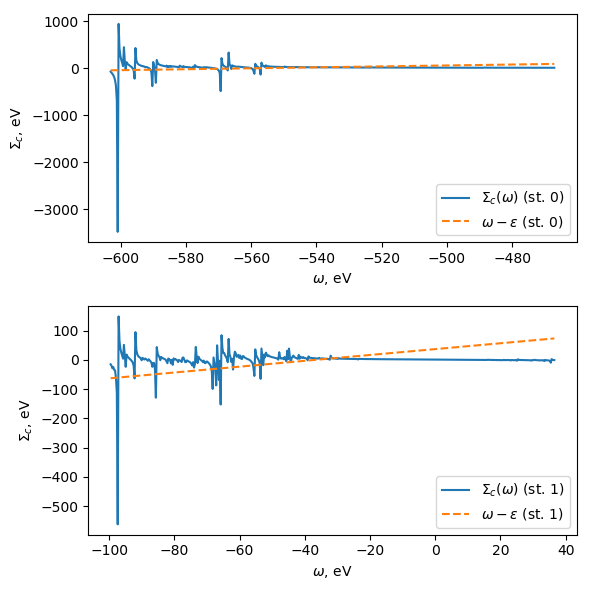

In [13]:
eps = gw_h2o_pbeh.eps
nocc = gw_h2o_pbeh.nocc
no_qp = gw_h2o_pbeh.no_qp
nv_qp = gw_h2o_pbeh.nv_qp



fig, axes = plt.subplots(nrows=2, figsize=(6,6), dpi=100)

for state in range(2):
    grid = gw_h2o_pbeh.omega_grid_all[state,:]*psi4.constants.hartree2ev
    sigma = gw_h2o_pbeh.Sigma_c_grid[state,:].real*psi4.constants.hartree2ev
    l = grid - (eps[state] + gw_h2o_pbeh.Sigma_x_Vxc[state])*psi4.constants.hartree2ev
    axes[state].plot(grid, sigma, label = '$\Sigma_c(\omega)$ (st. {0:d})'.format(state))
    axes[state].plot(grid, l, '--', label = '$\omega - \epsilon$ (st. {0:d})'.format(state))
    axes[state].set_xlabel('$\omega$, eV')
    axes[state].set_ylabel('$\Sigma_c$, eV')
    axes[state].legend()
    
fig.tight_layout()    


<Figure size 1800x3000 with 0 Axes>

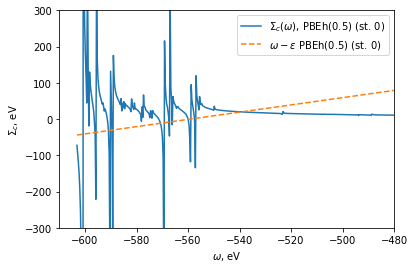

<Figure size 1800x3000 with 0 Axes>

In [37]:
eps0 = gw_h2o_approx.eps
eps1 = gw_h2o_pbeh.eps
eps2 = gw_h2o_pbeh25.eps
nocc = gw_h2o_approx.nocc
state = 0


#grid0 =gw_h2o_approx.omega_grid_all[state,:]*psi4.constants.hartree2ev
#sigma0 = gw_h2o_approx.Sigma_c_grid[state,:].real*psi4.constants.hartree2ev
grid1 =gw_h2o_pbeh.omega_grid_all[state,:]*psi4.constants.hartree2ev
sigma1 = gw_h2o_pbeh.Sigma_c_grid[state,:].real*psi4.constants.hartree2ev
grid2 =gw_h2o_pbeh25.omega_grid_all[state,:]*psi4.constants.hartree2ev
sigma2 = gw_h2o_pbeh25.Sigma_c_grid[state,:].real*psi4.constants.hartree2ev
#l0 = grid0 - (eps0[state] + gw_h2o_approx.Sigma_x_Vxc[state])*psi4.constants.hartree2ev
l1 = grid1 - (eps1[state] + gw_h2o_pbeh.Sigma_x_Vxc[state])*psi4.constants.hartree2ev
#l2 = grid2 - (eps2[state] + gw_h2o_pbeh25.Sigma_x_Vxc[state])*psi4.constants.hartree2ev
#plt.plot(grid0, sigma0, label = '$\Sigma_c(\omega)$, PBE (st. {0:d})'.format(state))
plt.plot(grid1, sigma1, label = '$\Sigma_c(\omega)$, PBEh(0.5) (st. {0:d})'.format(state))
#plt.plot(grid2, sigma2, label = '$\Sigma_c(\omega)$, PBEh(0.25) (st. {0:d})'.format(state))
#plt.plot(grid0, l0, '--', label = '$\omega - \epsilon$ PBE (st. {0:d})'.format(state))
plt.plot(grid1, l1, '--', label = '$\omega - \epsilon$ PBEh(0.5) (st. {0:d})'.format(state))
#plt.plot(grid2, l2, '--', label = '$\omega - \epsilon$ PBEh(0.25) (st. {0:d})'.format(state))
plt.xlabel('$\omega$, eV')
plt.ylabel('$\Sigma_c$, eV')
plt.xlim([-610., -480.])
plt.ylim([-300., 300.])
plt.legend()
plt.figure(figsize=(6,10), dpi=300)    

